# Face Detection


### libraries


In [20]:
import cv2
import matplotlib.pyplot as plt


In [22]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [23]:
model  = cv2.dnn_DetectionModel(frozen_model,config_file)

In [25]:
classLabels = []
file_name ='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')


In [26]:
print(len(classLabels))

80


In [27]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

< cv2.dnn.Model 0000016968E909B0>

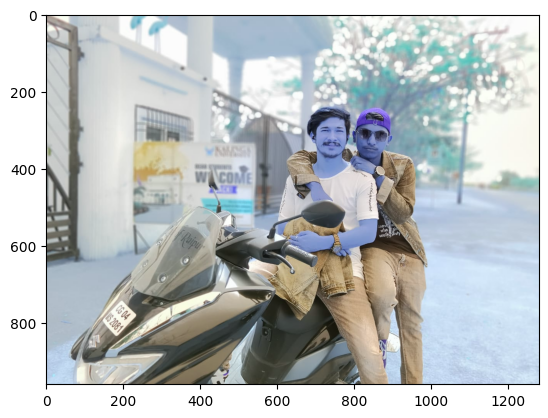

In [28]:
img = cv2.imread('pk2.jpg')
plt.imshow(img)

In [29]:
ClassIndex,confidence,bbox = model.detect(img,confThreshold=0.5)
print(ClassIndex)

[1 1 4]


In [30]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

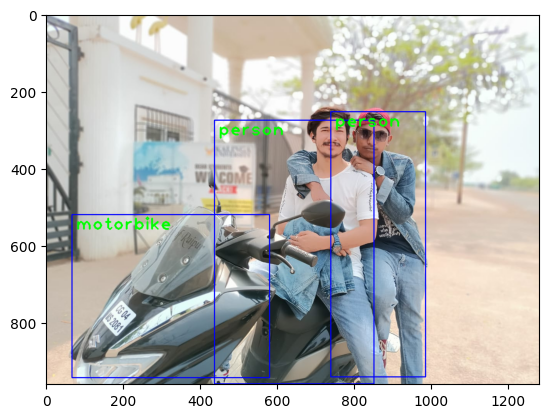

In [31]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

### video

In [ ]:
cap = cv2.VideoCapture('f.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError('Cant open the video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    print(ClassIndex)
    cv2.rectangle(frame,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

    cv2.imshow('Object Detection ', frame)
    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError('Cant open the video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
                    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    print(ClassIndex)
    if (len(ClassIndex) != 0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

    cv2.imshow('Object Detection ', frame)
    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()